In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\bank-full.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



# Input variables:

   # bank client data:

   1. - age (numeric)

   2. - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",

                                       "blue-collar","self-employed","retired","technician","services") 

   3. - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4. - education (categorical: "unknown","secondary","primary","tertiary")

   5. - default: has credit in default? (binary: "yes","no")

   6. - balance: average yearly balance, in euros (numeric) 

   7. - housing: has housing loan? (binary: "yes","no")

   8. - loan: has personal loan? (binary: "yes","no")

   # related with the last contact of the current campaign:

   9. - contact: contact communication type (categorical: "unknown","telephone","cellular") 

  10. - day: last contact day of the month (numeric)

  11. - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12. - duration: last contact duration, in seconds (numeric)

   # other attributes:

  13. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15. - previous: number of contacts performed before this campaign and for this client (numeric)

  16. - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

17. - y - has the client subscribed a term deposit? (binary: "yes","no")

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
num_cols = [i for i in df.columns if df[i].dtype!="object"]

num_cols

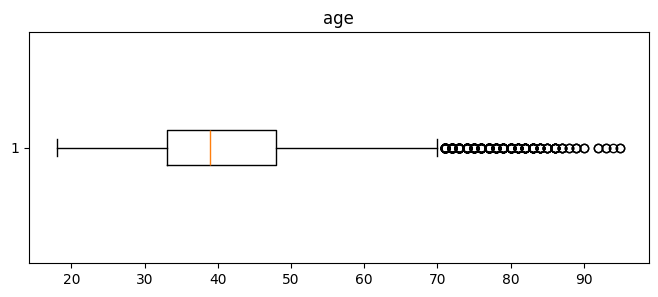

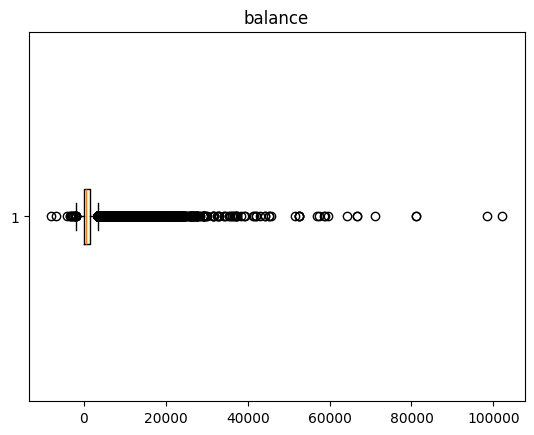

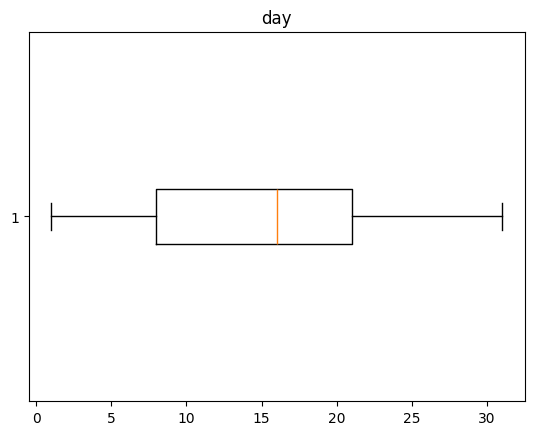

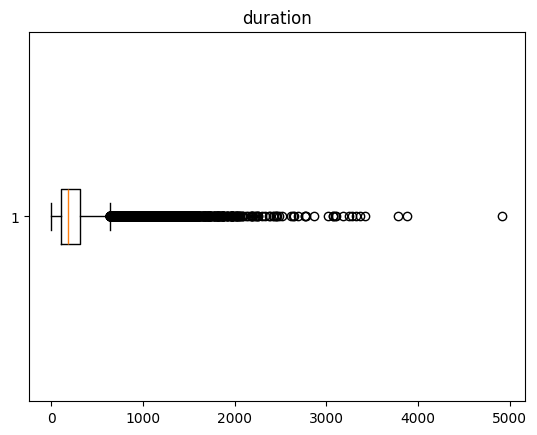

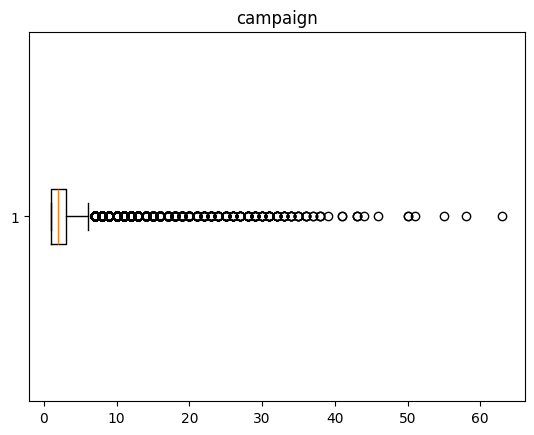

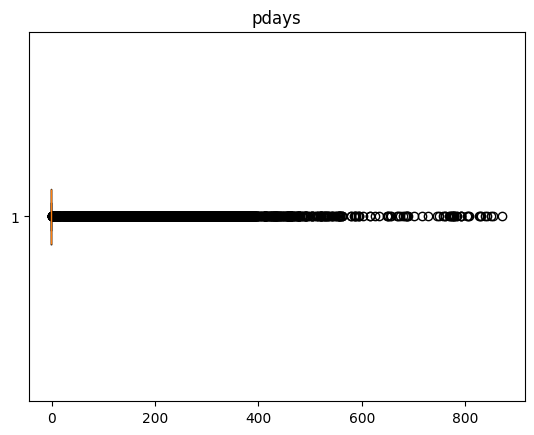

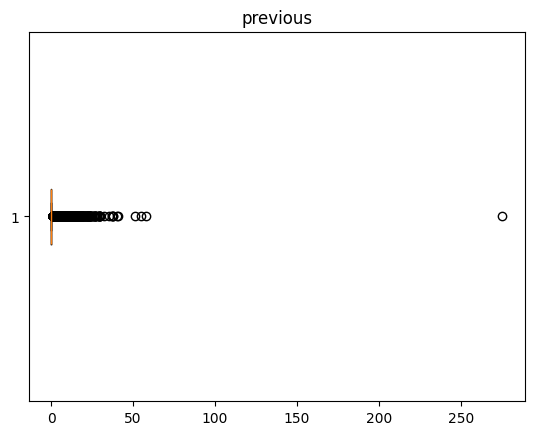

In [6]:
plt.figure(figsize=(8, 3))
for i in df[num_cols]:
    plt.boxplot(df[i], vert=False)
    plt.title(i)
    plt.show()

In [7]:
df["job"].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [8]:
df["marital"].value_counts

<bound method IndexOpsMixin.value_counts of 0         married
1          single
2         married
3         married
4          single
           ...   
45206     married
45207    divorced
45208     married
45209     married
45210     married
Name: marital, Length: 45211, dtype: object>

In [9]:
df["education"].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [10]:
df["education"] = df["education"].replace("unknown", "primary")

In [11]:
df["education"].value_counts()

education
secondary    23202
tertiary     13301
primary       8708
Name: count, dtype: int64

In [12]:
df["default"].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [13]:
df["housing"].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [14]:
df["loan"].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [15]:
df["contact"].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [16]:
df["month"].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [17]:
df["poutcome"].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [18]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [19]:
quant_up = df[num_cols].quantile(0.9)
quant_up

age           56.0
balance     3574.0
day           28.0
duration     548.0
campaign       5.0
pdays        185.0
previous       2.0
Name: 0.9, dtype: float64

In [20]:
quant_down = df[num_cols].quantile(0.1)
quant_down

age         29.0
balance      0.0
day          5.0
duration    58.0
campaign     1.0
pdays       -1.0
previous     0.0
Name: 0.1, dtype: float64

In [22]:
for i, j in dict(quant_up).items():
    df = df[df[i]<=j]

In [23]:
df.shape

(23697, 17)

In [24]:
for i, j in dict(quant_down).items():
    df = df[df[i]>=j]

In [25]:
df.shape

(15761, 17)

In [26]:
df["y"].value_counts()

y
no     14953
yes      808
Name: count, dtype: int64

In [27]:
from sklearn.utils import resample

In [28]:
yes_data = df[df["y"]=="yes"]
no_data = df[df["y"]=="no"]

In [29]:
yes_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1200,32,blue-collar,single,primary,no,611,yes,no,unknown,8,may,541,3,-1,0,unknown,yes
1340,49,admin.,divorced,secondary,no,168,yes,yes,unknown,8,may,513,1,-1,0,unknown,yes
1647,31,technician,single,tertiary,no,22,yes,no,unknown,9,may,483,3,-1,0,unknown,yes
1688,31,admin.,married,secondary,no,307,yes,no,unknown,9,may,538,1,-1,0,unknown,yes
2053,45,blue-collar,married,primary,no,101,yes,no,unknown,12,may,460,5,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45176,54,admin.,married,secondary,no,66,yes,no,cellular,11,nov,167,1,-1,0,unknown,yes
45187,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0,unknown,yes
45192,29,management,single,tertiary,no,765,no,no,cellular,16,nov,238,1,-1,0,unknown,yes
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes


In [30]:
no_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,primary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,primary,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45135,53,blue-collar,married,primary,no,1294,no,no,unknown,28,oct,71,1,-1,0,unknown,no
45139,44,management,married,tertiary,no,839,no,no,cellular,8,nov,240,1,40,2,other,no
45161,31,management,married,tertiary,no,720,yes,no,cellular,9,nov,94,3,-1,0,unknown,no
45167,48,admin.,married,secondary,no,178,no,no,cellular,10,nov,228,1,-1,0,unknown,no


In [31]:
up_sample = resample(yes_data, n_samples=(len(no_data)))

In [32]:
up_sample

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39456,29,technician,single,secondary,no,590,no,no,cellular,25,may,124,1,-1,0,unknown,yes
42550,52,unemployed,divorced,secondary,no,230,no,no,cellular,24,dec,422,2,-1,0,unknown,yes
40566,34,blue-collar,single,primary,no,79,no,no,telephone,10,jul,336,4,-1,0,unknown,yes
14560,45,admin.,married,secondary,no,0,no,yes,telephone,15,jul,533,3,-1,0,unknown,yes
40566,34,blue-collar,single,primary,no,79,no,no,telephone,10,jul,336,4,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17344,40,services,married,secondary,no,473,yes,no,cellular,28,jul,383,3,-1,0,unknown,yes
42947,35,management,married,tertiary,no,62,no,no,cellular,8,feb,469,2,185,2,failure,yes
41295,42,management,married,tertiary,no,294,no,no,cellular,26,aug,513,1,-1,0,unknown,yes
40833,39,admin.,married,secondary,no,260,yes,no,cellular,11,aug,175,2,116,2,failure,yes


In [33]:
up_sample.duplicated().sum()

14145

In [34]:
data = pd.concat([up_sample, no_data])

In [35]:
data.shape

(29906, 17)

In [36]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39456,29,technician,single,secondary,no,590,no,no,cellular,25,may,124,1,-1,0,unknown,yes
42550,52,unemployed,divorced,secondary,no,230,no,no,cellular,24,dec,422,2,-1,0,unknown,yes
40566,34,blue-collar,single,primary,no,79,no,no,telephone,10,jul,336,4,-1,0,unknown,yes
14560,45,admin.,married,secondary,no,0,no,yes,telephone,15,jul,533,3,-1,0,unknown,yes
40566,34,blue-collar,single,primary,no,79,no,no,telephone,10,jul,336,4,-1,0,unknown,yes


In [37]:
obj_cols = [i for i in data.columns if data[i].dtype=="object"]

In [38]:
obj_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [39]:
ohe = OneHotEncoder(drop="first")

In [40]:
encoded = ohe.fit_transform(data[obj_cols]).toarray()

In [41]:
features = ohe.get_feature_names_out()

In [42]:
data[features] = encoded

In [43]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
39456,29,technician,single,secondary,no,590,no,no,cellular,25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
42550,52,unemployed,divorced,secondary,no,230,no,no,cellular,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
40566,34,blue-collar,single,primary,no,79,no,no,telephone,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14560,45,admin.,married,secondary,no,0,no,yes,telephone,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
40566,34,blue-collar,single,primary,no,79,no,no,telephone,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [44]:
data.drop(obj_cols, axis=1, inplace=True)

In [45]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
39456,29,590,25,124,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
42550,52,230,24,422,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
40566,34,79,10,336,4,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14560,45,0,15,533,3,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
40566,34,79,10,336,4,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [46]:
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [47]:
scaler = StandardScaler()

In [48]:
data[num_cols] = scaler.fit_transform(data[num_cols])

In [49]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
39456,-1.360908,-0.268557,1.426492,-0.955267,-0.828411,-0.375515,-0.376593,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
42550,1.553081,-0.668936,1.277136,1.263204,0.083085,-0.375515,-0.376593,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
40566,-0.727432,-0.836873,-0.813854,0.622974,1.906078,-0.375515,-0.376593,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14560,0.666215,-0.924734,-0.067072,2.089547,0.994581,-0.375515,-0.376593,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
40566,-0.727432,-0.836873,-0.813854,0.622974,1.906078,-0.375515,-0.376593,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [50]:
X = data.drop("y_yes", axis=1)
y = data["y_yes"]

In [51]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=243)

In [52]:
model = KNeighborsClassifier(n_neighbors=7)

In [53]:
model.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=7)

In [54]:
model.score(X_tr, y_tr)

0.9548103563580778

In [55]:
y_pred = model.predict(X_te)

In [56]:
accuracy_score(y_te, y_pred)

0.9422648238965671

In [ ]:
sns.heatmap(confusion_matrix(y_te, y_pred), annot )